<a href="https://colab.research.google.com/github/sathasivamn/Customer-segmentation---Project-586/blob/main/Customer_Segmentation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("marketing_campaign.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
df.isna().sum().sum()

np.int64(24)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum().sum()

np.int64(0)

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In [12]:
df['Education'].value_counts()

,count
Education,
Graduation,1116
PhD,481
Master,365
2n Cycle,200
Basic,54


In [13]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [14]:
df['Age'] = 2025 - df['Year_Birth']

In [15]:
df['Age']

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [16]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [17]:
df['Total_Children']

,Total_Children
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [18]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']

In [19]:
df['Total_Spending'] = df[spend_cols].sum(axis=1)

In [20]:
df['Total_Spending']

,Total_Spending
0,1529
1,21
2,734
3,48
4,407
...,...
2235,1094
2236,436
2237,1217
2238,782


In [21]:
df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [22]:
df['Customer_Since']

,Customer_Since
0,4799
1,4249
2,4448
3,4275
4,4297
...,...
2235,4517
2236,4155
2237,4291
2238,4292


                                            EDA

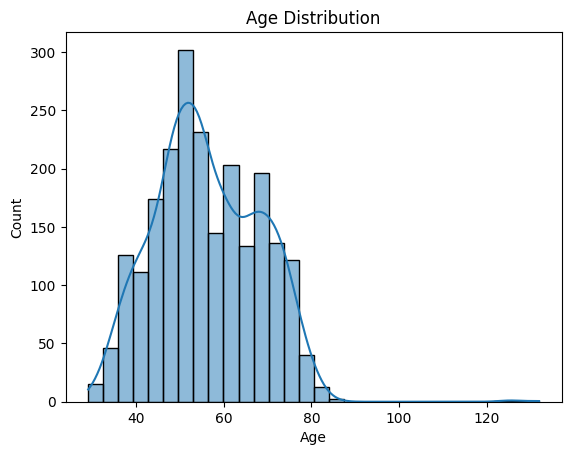

In [23]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

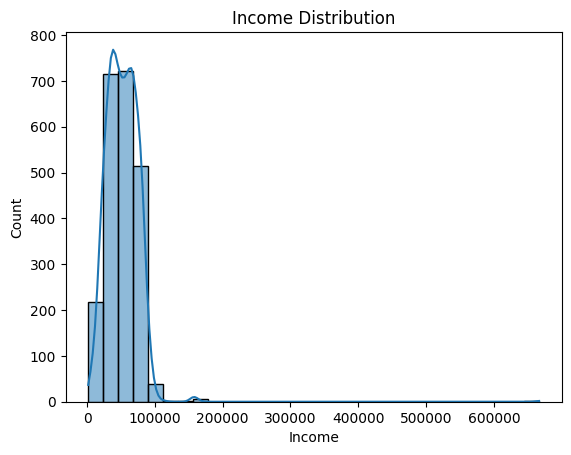

In [24]:
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

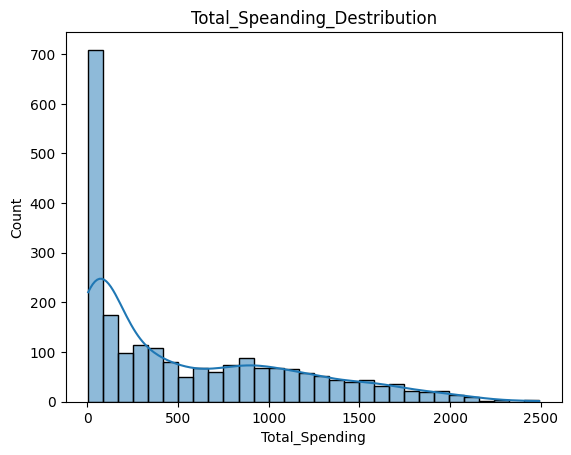

In [25]:
sns.histplot(df['Total_Spending'], bins=30, kde=True)
plt.title("Total_Speanding_Destribution")
plt.show()

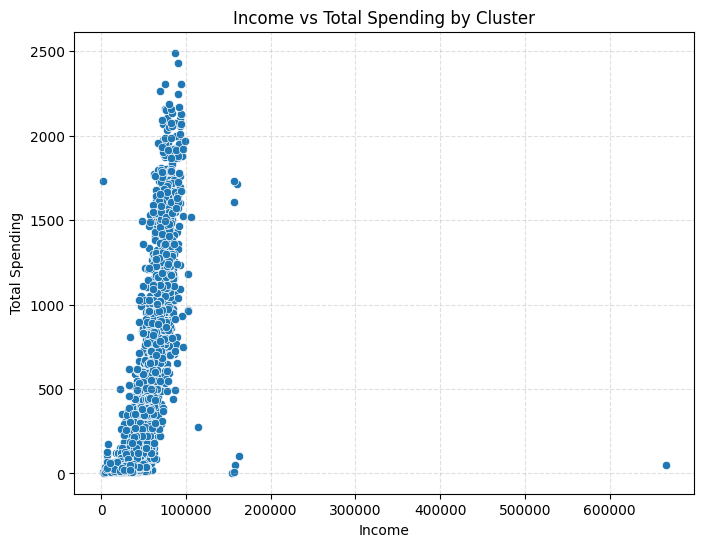

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y='Total_Spending')
plt.title("Income vs Total Spending by Cluster")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


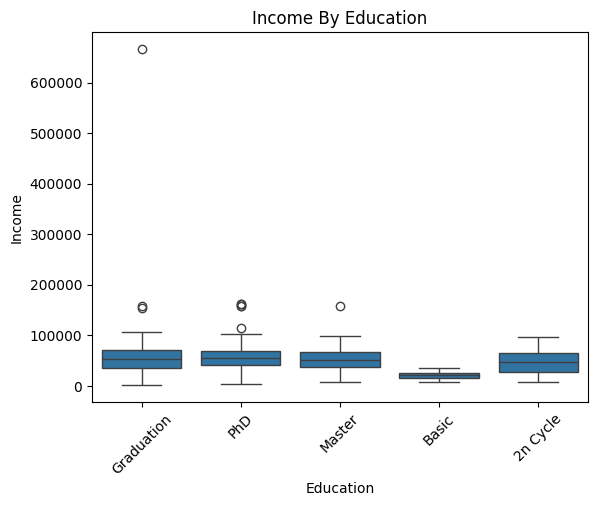

In [27]:
sns.boxplot(x="Education", y="Income", data = df)
plt.xticks(rotation= 45)
plt.title('Income By Education')
plt.show()

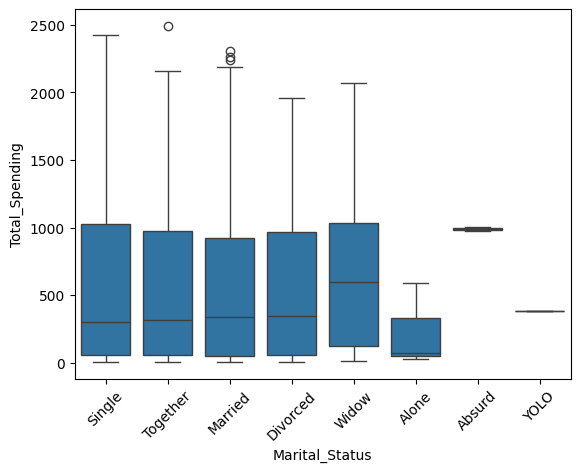

In [28]:
sns.boxplot(x="Marital_Status", y="Total_Spending", data = df)
plt.xticks(rotation = 45)
plt.show()

In [29]:
corr = df[["Income","Age", "Recency", "Total_Spending", "NumWebPurchases", "NumStorePurchases"]].corr()

In [30]:
corr

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.668062,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.112779,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.019374,-0.005641,-0.000434
Total_Spending,0.668062,0.112779,0.019374,1.000000,0.515999,0.670327
NumWebPurchases,0.387878,0.153051,-0.005641,0.515999,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.670327,0.516240,1.000000


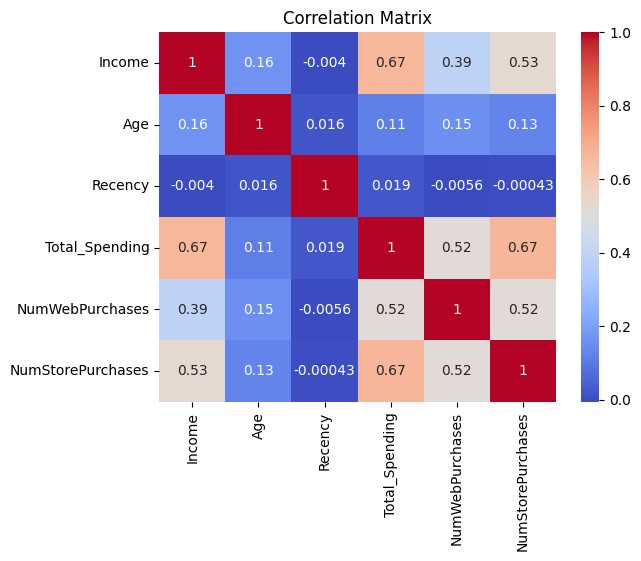

In [31]:
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [32]:
pivot_income = df.pivot_table(
    values="Income",
    index="Education",
    columns="Marital_Status",
    aggfunc="mean"
)


In [33]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


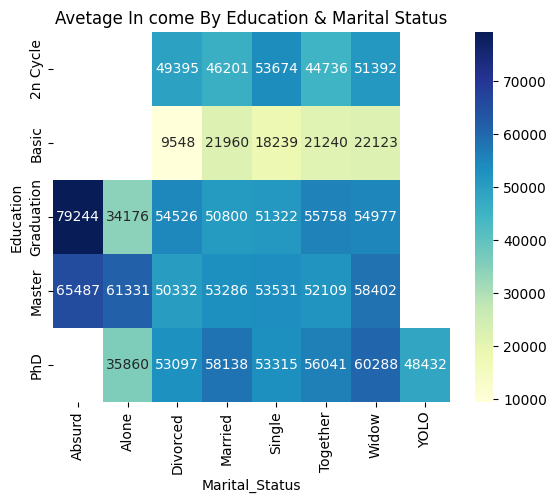

In [34]:
sns.heatmap(pivot_income, annot = True, fmt=".0f", cmap="YlGnBu")
plt.title("Avetage In come By Education & Marital Status")
plt.show()

In [35]:
group1= df.groupby("Education")["Total_Spending"].mean().sort_values(ascending = False)

In [36]:
group1

,Total_Spending
Education,
PhD,644.330561
Graduation,571.002688
Master,569.578082
2n Cycle,448.050000
Basic,58.962963


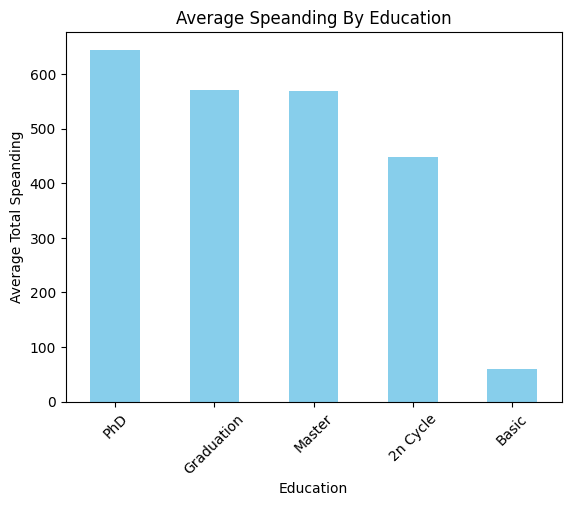

In [37]:
group1.plot(kind= "bar", color = "skyblue")
plt.title("Average Speanding By Education")
plt.ylabel("Average Total Speanding")
plt.xticks(rotation = 45)
plt.show()

In [38]:
df['AcceptedAny'] = df[["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Response"]].sum(axis=1)

In [39]:
df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5])

In [40]:
df['AcceptedAny'] = df['AcceptedAny'].apply(lambda x: 1 if x>0 else 0)

In [41]:
df['AcceptedAny'].unique()

array([1, 0])

In [42]:
group2 = df.groupby("Marital_Status")['AcceptedAny'].mean().sort_values(ascending = False)

In [43]:
group2

,AcceptedAny
Marital_Status,
Absurd,0.500000
YOLO,0.500000
Widow,0.342105
Alone,0.333333
Single,0.312102
Divorced,0.297414
Married,0.252042
Together,0.251309


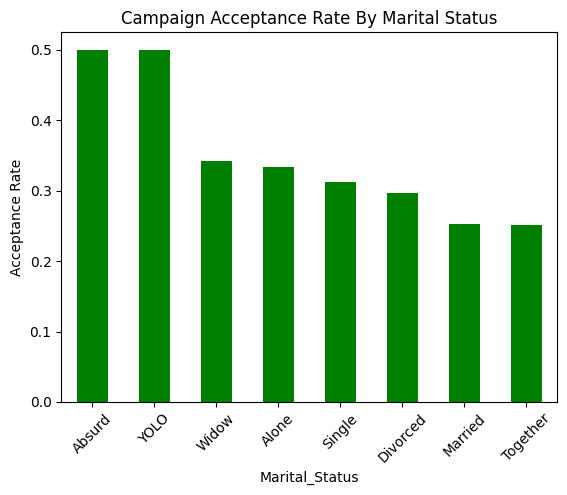

In [44]:
group2.plot(kind= "bar", color = "green")
plt.title("Campaign Acceptance Rate By Marital Status")
plt.ylabel("Acceptance Rate")
plt.xticks(rotation = 45)
plt.show()

In [45]:
bins = [18, 30, 40, 50, 60, 70, 90]

In [46]:
labels = ["18-29", "30-39", "40-49", "50-59", "60-69", "70+"]

In [47]:
df["Agegroup"] = pd.cut(df['Age'], bins = bins, labels=labels)

In [48]:
df["Agegroup"]

,Agegroup
0,60-69
1,70+
2,50-59
3,40-49
4,40-49
...,...
2235,50-59
2236,70+
2237,40-49
2238,60-69


In [49]:
group3 = df.groupby("Agegroup")['Income'].mean()

/tmp/ipython-input-2392985741.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("Agegroup")['Income'].mean()


In [50]:
group3

,Income
Agegroup,
18-29,46658.000000
30-39,46283.028302
40-49,49224.877034
50-59,50812.913303
60-69,56200.827887
70+,58944.316294


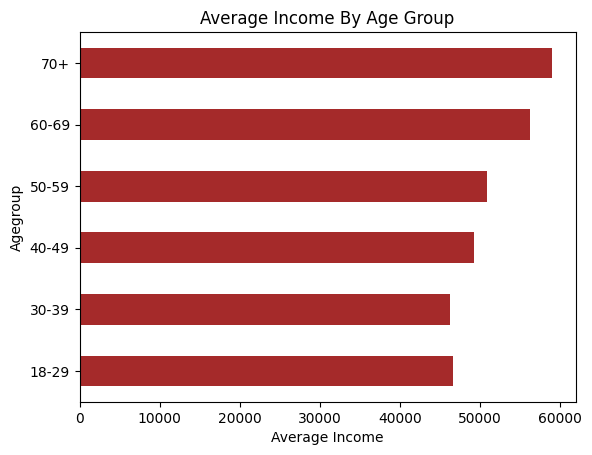

In [51]:
group3.plot(kind = "barh", color = "brown")
plt.title("Average Income By Age Group")
plt.xlabel("Average Income")
plt.show()

In [52]:
# 1. Select features for clustering
# Exclude 'ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', and individual spending columns
# as TotalSpending is included. Include engineered features and other relevant ones.
clustering_features = [
    'Income', 'Recency', 'Age', 'Total_Spending',
    'Education', 'Marital_Status', 'Kidhome', 'Teenhome',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
    'Complain', 'Response'
]

df_clustering = df[clustering_features].copy()

In [53]:
# 2. Identify and handle outliers in numerical features
# Using IQR to identify and cap outliers to the 95th percentile to avoid removing data.
numerical_cols = ['Income', 'Recency', 'Age','Total_Spending', 'NumDealsPurchases',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']

for col in numerical_cols:
    Q1 = df_clustering[col].quantile(0.25)
    Q3 = df_clustering[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers to the 95th percentile
    upper_cap = df_clustering[col].quantile(0.95)
    df_clustering[col] = np.where(df_clustering[col] > upper_cap, upper_cap, df_clustering[col])

In [54]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'AcceptedAny', 'Agegroup'],
      dtype='object')

In [55]:
features = ["Age", "Income", "Total_Spending", 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',"Recency"]

In [56]:
X = df[features].copy()

In [57]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1529,8,4,7,58
1,71,46344.0,21,1,2,5,38
2,60,71613.0,734,8,10,4,26
3,41,26646.0,48,2,4,6,26
4,44,58293.0,407,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1094,9,4,5,46
2236,79,64014.0,436,8,5,7,56
2237,44,56981.0,1217,2,13,6,91
2238,69,69245.0,782,6,10,3,8


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# Features for clustering
features = ["Age", "Income", "Total_Spending", 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',"Recency"]

# Adding encoded categorical (e.g., Education, Marital_Status)
cat_cols = ['Education','Marital_Status']
num_cols = features.copy()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
], remainder='drop')

X = preprocessor.fit_transform(df[num_cols + cat_cols])

# Save transformer
joblib.dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [59]:
features = ['Age', 'Income', 'Total_Spending', 'NumWebPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']
scaler_X = df[features]


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [61]:
X_pre = scaler.fit_transform(scaler_X)
X_pre

array([[ 0.98644293,  0.2340627 ,  1.67383183, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.93944575, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.29614239, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.13315371, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.37932364, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7141632 , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)
print("PCA explained variance ratio:", pca.explained_variance_ratio_.sum())
joblib.dump(pca, 'pca_transform.joblib')

PCA explained variance ratio: 0.4857495014754366


['pca_transform.joblib']

In [63]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
import itertools, tqdm

def evaluate_labels(X, labels):
    if len(set(labels)) <= 1:  # invalid clustering
        return {'sil': -1, 'ch': -1, 'db': np.inf, 'n_clusters': len(set(labels))}
    return {
        'sil': silhouette_score(X, labels),
        'ch': calinski_harabasz_score(X, labels),
        'db': davies_bouldin_score(X, labels),
        'n_clusters': len(set(labels))
    }

Model 1 - K-Means tuning

In [64]:
k_range = range(2,11)
kmeans_results = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pre)
    scores = evaluate_labels(X_pre, labels)
    scores.update({'model':'KMeans','param_k':k})
    kmeans_results.append(scores)
kmeans_df = pd.DataFrame(kmeans_results).sort_values(by='sil',ascending=False)
print(kmeans_df.head())

        sil           ch        db  n_clusters   model  param_k
0  0.321147  1139.980207  1.292238           2  KMeans        2
1  0.263492   794.251881  1.673930           3  KMeans        3
2  0.194340   661.024731  1.756590           4  KMeans        4
3  0.191300   577.032769  1.747535           5  KMeans        5
4  0.185996   521.804071  1.625057           6  KMeans        6


Model 2 - Agglomerative tuning

In [65]:
linkages = ['ward','complete','average']  # note: ward requires Euclidean
agg_results = []
for k in range(2,11):
    for link in linkages:
        try:
            ag = AgglomerativeClustering(n_clusters=k, linkage=link)
            labels = ag.fit_predict(X_pre)
            scores = evaluate_labels(X_pre, labels)
            scores.update({'model':'Agglomerative','param_k':k,'linkage':link})
            agg_results.append(scores)
        except Exception as e:
            pass
agg_df = pd.DataFrame(agg_results).sort_values(by='sil',ascending=False)
print(agg_df.head())

        sil         ch        db  n_clusters          model  param_k   linkage
1  0.859112  88.977865  0.101634           2  Agglomerative        2  complete
2  0.859112  88.977865  0.101634           2  Agglomerative        2   average
4  0.612034  60.042018  0.454583           3  Agglomerative        3  complete
5  0.612034  60.042018  0.454583           3  Agglomerative        3   average
8  0.496753  46.043679  0.552824           4  Agglomerative        4   average


Model 3 - DBSCAN tuning (density-based)

In [66]:
eps_values = [0.3,0.4,0.5,0.6,0.8,1.0,1.2]  # scaled feature space — experiment
min_samples_values = [3,5,7,10]

db_results = []
for eps, ms in itertools.product(eps_values, min_samples_values):
    db = DBSCAN(eps=eps, min_samples=ms)
    labels = db.fit_predict(X_pre)
    if len(set(labels)) <= 1:
        continue
    scores = evaluate_labels(X_pre, labels)
    scores.update({'model':'DBSCAN','eps':eps,'min_samples':ms})
    db_results.append(scores)
db_df = pd.DataFrame(db_results).sort_values(by='sil', ascending=False)
print(db_df.head())

         sil          ch        db  n_clusters   model  eps  min_samples
22  0.015149   42.498839  2.953678           3  DBSCAN  1.2            7
21  0.012981   34.174491  3.314748           3  DBSCAN  1.2            5
19 -0.019882  115.322017  1.941854           7  DBSCAN  1.0           10
23 -0.020734   51.270229  2.706612           3  DBSCAN  1.2           10
17 -0.046142   43.376339  2.010373           6  DBSCAN  1.0            5


Model 4 - GMM tuning (soft clustering)

In [67]:
gmm_results = []
for k in range(2,11):
    for cov in ['full','tied','diag','spherical']:
        try:
            gmm = GaussianMixture(n_components=k, covariance_type=cov, random_state=42)
            labels = gmm.fit_predict(X_pre)
            scores = evaluate_labels(X_pre, labels)
            scores.update({'model':'GMM','param_k':k,'cov':cov})
            gmm_results.append(scores)
        except Exception as e:
            pass
gmm_df = pd.DataFrame(gmm_results).sort_values(by='sil', ascending=False)
print(gmm_df.head())

        sil           ch        db  n_clusters model  param_k        cov
1  0.320012  1119.076371  1.305732           2   GMM        2       tied
0  0.306976  1060.807564  1.335778           2   GMM        2       full
3  0.303675  1041.612654  1.315289           2   GMM        2  spherical
4  0.298094   549.521194  1.321589           3   GMM        3       full
2  0.260663   873.939419  1.348304           2   GMM        2       diag


Model Comparison & Select Best

In [68]:
# collect top result from each model type
candidates = pd.concat([
    kmeans_df.head(3),
    agg_df.head(3),
    db_df.head(3),
    gmm_df.head(3)
], ignore_index=True, sort=False)

# sort by silhouette primarily, then CH
candidates_sorted = candidates.sort_values(by=['sil','ch'], ascending=[False,False]).reset_index(drop=True)
print(candidates_sorted.head(10))

# Choose best by silhouette (tie-breaker: CH vs DB)
best_model_row = candidates_sorted.iloc[0]
best_model_row

        sil           ch        db  n_clusters          model  param_k  \
0  0.859112    88.977865  0.101634           2  Agglomerative      2.0   
1  0.859112    88.977865  0.101634           2  Agglomerative      2.0   
2  0.612034    60.042018  0.454583           3  Agglomerative      3.0   
3  0.321147  1139.980207  1.292238           2         KMeans      2.0   
4  0.320012  1119.076371  1.305732           2            GMM      2.0   
5  0.306976  1060.807564  1.335778           2            GMM      2.0   
6  0.303675  1041.612654  1.315289           2            GMM      2.0   
7  0.263492   794.251881  1.673930           3         KMeans      3.0   
8  0.194340   661.024731  1.756590           4         KMeans      4.0   
9  0.015149    42.498839  2.953678           3         DBSCAN      NaN   

    linkage  eps  min_samples        cov  
0  complete  NaN          NaN        NaN  
1   average  NaN          NaN        NaN  
2  complete  NaN          NaN        NaN  
3       NaN  

,0
sil,0.859112
ch,88.977865
db,0.101634
n_clusters,2
model,Agglomerative
param_k,2.0
linkage,complete
eps,NaN
min_samples,NaN
cov,NaN


Best model = Agglomerative

MODEL EVOLUTION (KMeans, Agglomerative, DBSCAN, GMM)

In [69]:
import warnings, re
from sklearn.decomposition import PCA

In [70]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [71]:
# ----------1 Define grids for each model ----------
grid = {
    "KMeans": {"n_clusters": list(range(2, 8))},
    "Agglomerative": {"n_clusters": list(range(2, 8))},
    "DBSCAN": {"eps": [0.4, 0.6, 0.8, 1.0], "min_samples": [3, 5]},
    "GMM": {"n_components": list(range(2, 8))}
}

In [72]:
# ---------- 2 Helper: safe scoring ----------
def safe_scores(X, labels):
    """Compute silhouette, Calinski–Harabasz, Davies–Bouldin safely"""
    out = {"n_clusters": np.nan, "silhouette": np.nan,
           "calinski_harabasz": np.nan, "davies_bouldin": np.nan}
    labels = np.asarray(labels)
    uniq = np.unique(labels)
    n_clusters = len(uniq[uniq != -1]) if -1 in uniq else len(uniq)
    out["n_clusters"] = n_clusters
    if n_clusters <= 1:  # metrics invalid
        return out
    mask = labels != -1
    X_use, y_use = X[mask], labels[mask]
    try: out["silhouette"] = silhouette_score(X_use, y_use)
    except: pass
    try: out["calinski_harabasz"] = calinski_harabasz_score(X_use, y_use)
    except: pass
    try: out["davies_bouldin"] = davies_bouldin_score(X_use, y_use)
    except: pass
    return out

In [73]:
# ---------- 3 Run evolution ----------
evolution, labels_dict = [], {}
run_id = 0

In [74]:
# KMeans
for k in grid["KMeans"]["n_clusters"]:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_pre)
    metrics = safe_scores(X_pre, labels)
    run_id += 1
    evolution.append({"id": run_id, "model": "KMeans", "params": f"k={k}", **metrics})
    labels_dict[run_id] = labels

In [75]:
# Agglomerative
for k in grid["Agglomerative"]["n_clusters"]:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_pre)
    metrics = safe_scores(X_pre, labels)
    run_id += 1
    evolution.append({"id": run_id, "model": "Agglomerative", "params": f"k={k}", **metrics})
    labels_dict[run_id] = labels

In [76]:
# DBSCAN
for eps in grid["DBSCAN"]["eps"]:
    for ms in grid["DBSCAN"]["min_samples"]:
        db = DBSCAN(eps=eps, min_samples=ms)
        labels = db.fit_predict(X_pre)
        metrics = safe_scores(X_pre, labels)
        run_id += 1
        evolution.append({"id": run_id, "model": "DBSCAN", "params": f"eps={eps},min_samples={ms}", **metrics})
        labels_dict[run_id] = labels

In [77]:
# GMM
for k in grid["GMM"]["n_components"]:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(X_pre)
    metrics = safe_scores(X_pre, labels)
    run_id += 1
    evolution.append({"id": run_id, "model": "GMM", "params": f"k={k}", **metrics})
    labels_dict[run_id] = labels

evo_df = pd.DataFrame(evolution)

In [78]:
# ---------- 4 Pick best model ----------
# Assumes evo_df and labels_dict exist from the evolution run

# Try to pick the best KMeans by silhouette first
kmeans_rows = evo_df[evo_df["model"] == "KMeans"].dropna(subset=["silhouette"])
if not kmeans_rows.empty:
    # take the KMeans row with highest silhouette
    best_row = kmeans_rows.loc[kmeans_rows["silhouette"].idxmax()]
else:
    # fallback to previous logic: best overall by silhouette, otherwise CH score
    valid = evo_df.dropna(subset=["silhouette"])
    if not valid.empty:
        best_row = valid.loc[valid["silhouette"].idxmax()]
    else:
        best_row = evo_df.loc[evo_df["calinski_harabasz"].idxmax()]

# Extract identifying info
best_id = int(best_row["id"])
best_model = best_row["model"]
best_params = best_row.get("params", "")
best_silhouette = best_row.get("silhouette", np.nan)

print(f" ✅ Chosen best run id: {best_id}")
print(f"    model: {best_model}")
print(f"    params: {best_params}")
print(f"    silhouette: {best_silhouette}")


 ✅ Chosen best run id: 1
    model: KMeans
    params: k=2
    silhouette: 0.32051882541896404


In [79]:
import joblib
from sklearn.cluster import KMeans
# If the best was KMeans, get its parameters (adjust if your evo_df stores params differently)
if best_model == "KMeans":
    # try to retrieve param_k if you stored it (some cells store param_k as 'param_k' or similar)
    if 'param_k' in best_row.index:
        best_k = int(best_row['param_k'])
    else:
        # try a simple parse fallback if params string contains "k=4"
        import re
        m = re.search(r'k\s*=\s*(\d+)', str(best_params))
        best_k = int(m.group(1)) if m else None

    if best_k is not None:
        final_model = KMeans(n_clusters=best_k, random_state=42, n_init=20).fit(X_pre)
        joblib.dump(final_model, 'best_kmeans_model.joblib')
        print("Saved KMeans model with k =", best_k)
    else:
        print("Could not determine best_k from best_row; please inspect best_params:", best_params)
else:
    print("Best model is not KMeans (it's:", best_model, ")")


Saved KMeans model with k = 2


In [80]:
print("best_model:", best_model)
print("best_id:", best_id)
print("Cluster sizes:\n", pd.Series(labels_dict[best_id]).value_counts().sort_index())
# silhouette of chosen labels on X_pre
from sklearn.metrics import silhouette_score
print("silhouette score:", silhouette_score(X_pre, labels_dict[best_id]))
# show cluster profile
df['Cluster'] = labels_dict[best_id]
# Compute cluster means only on numeric columns
df.groupby('Cluster').mean(numeric_only=True).round(3)



best_model: KMeans
best_id: 1
Cluster sizes:
 0    1161
1    1055
Name: count, dtype: int64
silhouette score: 0.3205188254190388


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,AcceptedAny
Cluster,,,,,,,,,,,,,,,,,,,,,
0,5606.700,1970.914,35752.871,0.742,0.499,48.659,65.496,5.910,31.795,8.923,...,0.003,0.011,3.0,11.0,0.103,54.086,1.241,118.021,4475.774,0.165
1,5568.163,1966.517,70398.887,0.111,0.513,49.402,568.760,48.857,315.781,69.237,...,0.026,0.008,3.0,11.0,0.202,58.483,0.624,1052.919,4504.649,0.392


In [81]:
import joblib
# Save the trained model
joblib.dump(best_model, "model_kmeans.pkl")

# Save the scaler (only if you used one)
joblib.dump(scaler, "scaler_kmeans.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!
